✨🎬 Project: Render Quality / Render Time Prediction (AI for CG Pipeline) 🚀🖥️

# 🚀 Render Time Prediction for CG Pipeline (AI + 3D)

**Author:** Rakesh Mahakur  
**Role:** 3D Artist | Aspiring Data Scientist  
**Tools:** Blender • Python • Pandas • Scikit-learn • Jupyter  

---

## 📌 Project Summary
This project builds a **regression-based machine learning model** to predict **Blender render time** using key scene metadata such as polygon count, texture size, number of lights, and output resolution.  
The goal is to **reduce trial-and-error** and support **better CG pipeline planning**.

---

## 🧠 Approach
- Problem Type: **Regression**
- Models Used:
  - Linear Regression (baseline)
  - Random Forest Regressor (ensemble)
- Best performance achieved using **Random Forest** due to its ability to capture non-linear relationships.

---

## 🎯 Outcome
- Accurate pre-render time estimation  
- Improved scene optimization decisions  
- Efficient CG production workflow  



📓 Render Time Prediction

1. Libraries Import

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


2. Dataset Load

In [14]:
import pandas as pd

df = pd.read_csv("D:/project/AIML/render_data.csv")
df.head()


,poly_count,texture_size_mb,light_count,resolution,render_time_sec
0,85000,20,1,1048576,9.5
1,120000,35,2,1048576,14.2
2,150000,40,2,1048576,16.8
3,180000,60,3,2073600,26.4
4,210000,70,3,2073600,29.1


3. Basic EDA

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   poly_count       25 non-null     int64  
 1   texture_size_mb  25 non-null     int64  
 2   light_count      25 non-null     int64  
 3   resolution       25 non-null     int64  
 4   render_time_sec  25 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.1 KB


In [16]:
df.describe()


,poly_count,texture_size_mb,light_count,resolution,render_time_sec
count,25.000000,25.000000,25.000000,2.500000e+01,25.000000
mean,514200.000000,255.000000,7.280000,4.687749e+06,114.776000
std,279678.684684,175.594229,3.758546,2.932517e+06,84.590525
min,85000.000000,20.000000,1.000000,1.048576e+06,9.500000
25%,280000.000000,110.000000,4.000000,2.073600e+06,43.500000
50%,500000.000000,220.000000,7.000000,4.147200e+06,94.100000
75%,740000.000000,390.000000,10.000000,8.294400e+06,179.600000
max,1000000.000000,600.000000,14.000000,8.294400e+06,288.500000


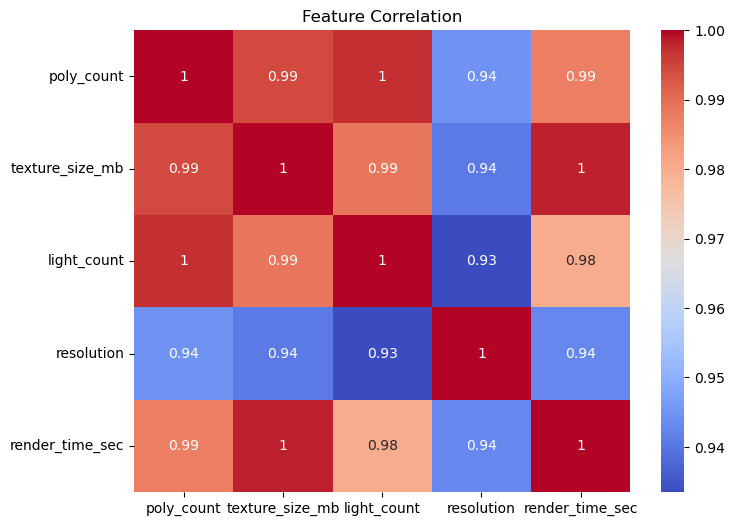

In [17]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


 4. Feature / Target Split

In [18]:
X = df[['poly_count', 'texture_size_mb', 'light_count', 'resolution']]
y = df['render_time_sec']


5. Train–Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


6. Linear Regression Model (Baseline)

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


📊 Evaluation

In [22]:
print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance
MAE: 2.1337171230628322
RMSE: 2.4378670176778012
R2 Score: 0.9992107779516064


7. Feature Importance (Linear Regression)

In [23]:
importance_lr = pd.DataFrame({
    "Feature": X.columns,
    "Impact": lr_model.coef_
}).sort_values(by="Impact", ascending=False)

importance_lr


,Feature,Impact
1,texture_size_mb,0.714729
3,resolution,0.000002
0,poly_count,-0.000164
2,light_count,-0.444091


8. Random Forest Regressor (STRONG MODEL)

In [24]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


📊 Evaluation

In [25]:
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance
MAE: 7.197800000000089
RMSE: 8.365680809115487
R2 Score: 0.9907064472923784


9. Feature Importance (Random Forest)

In [26]:
importance_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_rf


,Feature,Importance
1,texture_size_mb,0.280899
0,poly_count,0.262392
2,light_count,0.259993
3,resolution,0.196716


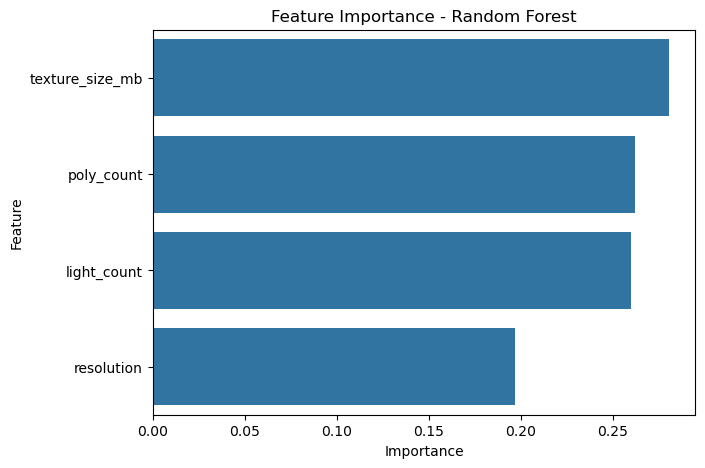

In [27]:
# Plot
plt.figure(figsize=(7,5))
sns.barplot(x="Importance", y="Feature", data=importance_rf)
plt.title("Feature Importance - Random Forest")
plt.show()

10. Prediction on New Scene (MOST IMPORTANT)

In [28]:
# New Blender scene data
new_scene = pd.DataFrame([{
    "poly_count": 350000,
    "texture_size_mb": 150,
    "light_count": 4,
    "resolution": 2073600
}])

predicted_time = rf_model.predict(new_scene)

print("Estimated Render Time (sec):", round(predicted_time[0], 2))


Estimated Render Time (sec): 51.24


11. Actual vs Predicted Plot

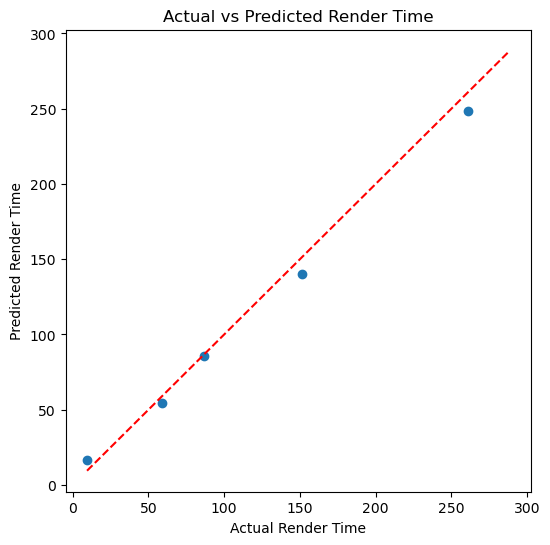

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Render Time")
plt.ylabel("Predicted Render Time")
plt.title("Actual vs Predicted Render Time")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


📌 Final Conclusion

## ✅ Conclusion
The Random Forest regression model demonstrated better performance compared to Linear Regression by capturing non-linear relationships between scene parameters and render time.  
This approach enables accurate pre-render estimation, helping optimize Blender scenes and improve CG pipeline efficiency.


## 🔮 Future Improvements
- Integrate real-time Blender metadata collection using bpy automation
- Deploy the model as a lightweight Streamlit web application